1.217342132
1.163923912
1.109966875
1.055879217
1
1.274132266
1.220097587
1.167432398
1.113159162
1.058907415
1.495406074
1.39709145
1.299027403
1.199601514
1.099201741
1.316375859
1.261641008
1.207082654
1.153755624
1.099796495
1.476029229
1.379027179
1.281405271
1.180842909
1.078438533
1.296662975
1.242960794
1.188349133
1.134323748
1.078472889
1.535519886
1.437972828
1.33970025
1.240895186
1.13902293
1.356559343
1.302646545
1.248889873
1.19424763
1.138994545
1.49772858
1.402557646
1.305465095
1.20326763
1.104733246
1.32132233
1.265789179
1.213321486
1.158735347
1.104361592
1.719190752
1.614886876
1.512165088
1.411096889
1.30975255
1.536433726
1.47681339
1.418411463
1.364343879
1.309299793
1.730199202
1.708580278
1.653843512
1.598874399
1.545492726
[[1.21734213 1.16392391 1.10996688 1.05587922 1.        ]
 [1.27413227 1.22009759 1.1674324  1.11315916 1.05890741]
 [1.49540607 1.39709145 1.2990274  1.19960151 1.09920174]
 [1.31637586 1.26164101 1.20708265 1.15375562 1.0997965 ]
 [1.476

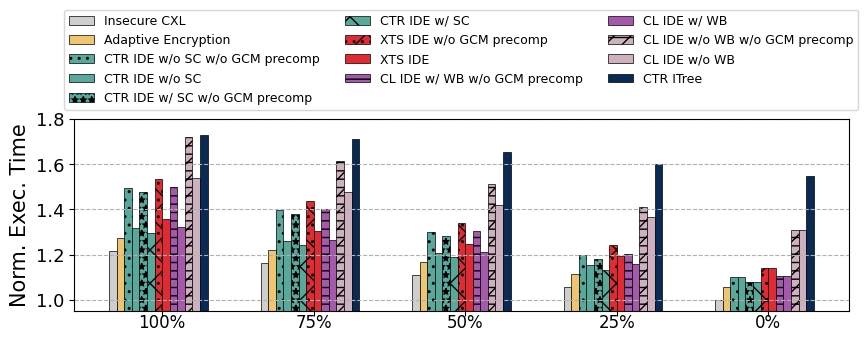

In [ ]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl
import itertools
#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=5
x=np.arange(N) 
xclicks=[
    '100%','75%', '50%', '25%', '0%',  
]
xlabels='CXL:Local Memory Ratio'
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="ratio.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(13, 5)
print(b1)


allfigsize=(10,2.5)     
width=0.05
plt.figure(figsize=allfigsize)

i = (lambda c: lambda: next(c))(itertools.count(0))
j = (lambda c: lambda: next(c))((itertools.count(0)))

print(b1[0])
# plt.bar(x - width*1, b1[0], width, label='w Pre. GCM & Adapt. Encryption', color='#f0c571',hatch="//", edgecolor='black', linewidth=0.5) 
# plt.bar(x , b1[1], width, label='w/o Pre. GCM', color='#a559aa', hatch="x", edgecolor='black', linewidth=0.5)
# plt.bar(x + width*1, b1[2], width, label='w/o Adapt. Encryption',color='#59a89c', hatch="." , edgecolor='black', linewidth=0.5)
off = 13.0 / 2
plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL',color='#cecece', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='Adaptive Encryption',color='#f0c571', edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE w/o SC w/o GCM precomp', color='#59a89c',  hatch="..", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE w/o SC', color='#59a89c' , edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE w/ SC w/o GCM precomp', color='#59a89c', hatch="**", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE w/ SC', color='#59a89c' , hatch="x", edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='XTS IDE w/o GCM precomp', color='#e02b35', hatch="x..",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='XTS IDE', color='#e02b35', hatch="",edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/ WB w/o GCM precomp',  color='#a559aa', hatch="--", edgecolor='black', linewidth=0.5, align='center' )
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/ WB',  color='#a559aa', edgecolor='black', linewidth=0.5, align='center' )

plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/o WB w/o GCM precomp', color='#CEB1BE', hatch="//--",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/o WB', color='#CEB1BE', edgecolor='black', linewidth=0.5, align='center')

plt.bar(x + width*(j() - off), b1[i()], width, label='CTR ITree', color='#082a54', edgecolor='black', linewidth=0.5, align='center')



########################################################

########################################################

# plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL ', color='#cecece',edgecolor='black', linewidth=0.5, align='center')
# plt.bar(x + width*(j() - off), b1[i()], width, label='Integrity Tree ', color='#082a54', edgecolor='black', linewidth=0.5, align='center')





plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, va='center_baseline') 
#plt.ylim(0,180000)
plt.ylim(0.95,  1.8)
plt.yticks([1.0, 1.2, 1.4, 1.6, 1.8],fontsize=13)
# plt.xlabel(xlabels,fontsize=10)
plt.ylabel(ylabels,fontsize=15)    

plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.50, 1.60), fontsize=9)    
plt.savefig('ratio.pdf',bbox_inches = 'tight')    
plt.show()